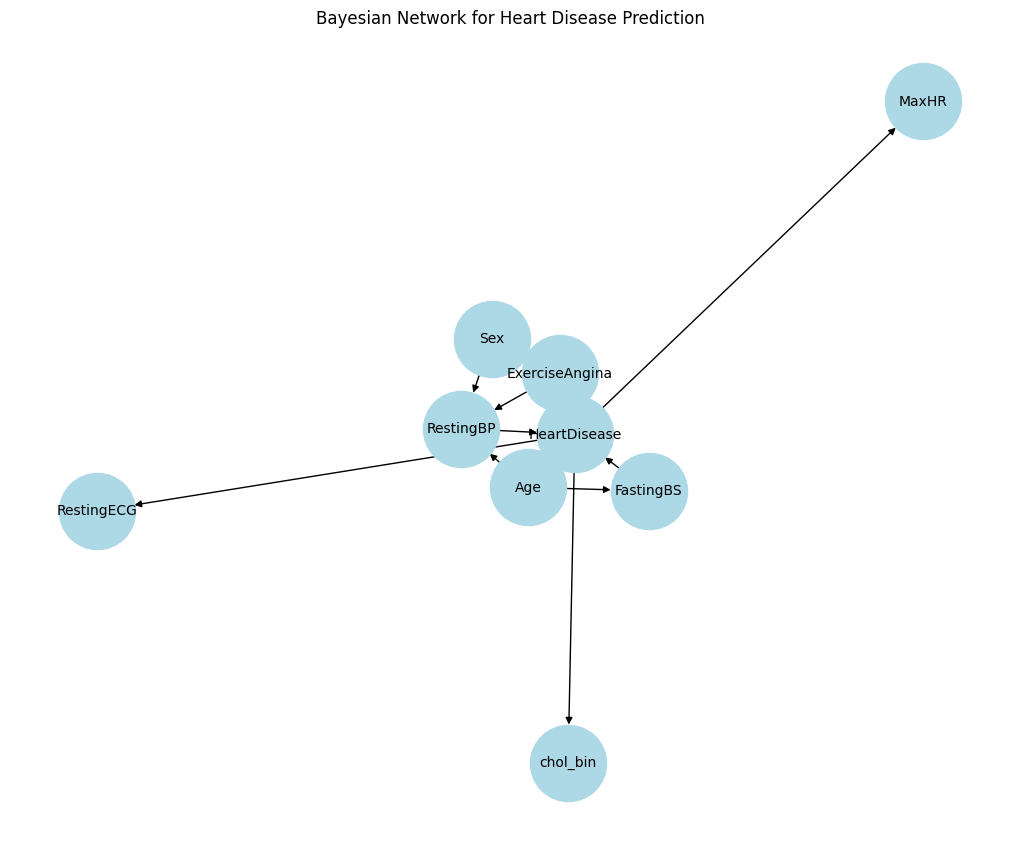

C:\Users\21118\AppData\Local\Programs\Python\Python312\Lib\site-packages\pgmpy\inference\ExactInference.py:763: SyntaxWarning: invalid escape sequence '\s'
  """


KeyError: 35

In [21]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Read Cleveland Heart Disease data
heartDisease = pd.read_csv('heart_disease.csv')
heartDisease = heartDisease.replace('?', np.nan)

# Step 2: Bin the cholesterol levels
bins = [0, 200, 240, 300]  # 0-200: Low, 200-240: Medium, 240-300: High
labels = ['Low', 'Medium', 'High']
heartDisease['chol_bin'] = pd.cut(heartDisease['Cholesterol'], bins=bins, labels=labels)

# Step 3: Define the Bayesian Network structure
model = BayesianNetwork([
    ('Age', 'RestingBP'),  # Link between Age and Resting Blood Pressure
    ('Age', 'FastingBS'),  # Link between Age and Fasting Blood Sugar
    ('Sex', 'RestingBP'),  # Link between Sex and Resting Blood Pressure
    ('ExerciseAngina', 'RestingBP'),  # Link between Exercise Angina and Resting Blood Pressure
    ('RestingBP', 'HeartDisease'),  # Link between Resting Blood Pressure and Heart Disease
    ('FastingBS', 'HeartDisease'),  # Link between Fasting Blood Sugar and Heart Disease
    ('HeartDisease', 'RestingECG'),  # Link between Heart Disease and Resting ECG
    ('HeartDisease', 'MaxHR'),  # Link between Heart Disease and Maximum Heart Rate
    ('HeartDisease', 'chol_bin')  # Link between Heart Disease and Cholesterol Bin
])

# Step 4: Learn CPDs using Maximum Likelihood Estimators
model.fit(heartDisease, estimator=MaximumLikelihoodEstimator)

# Step 5: Visualize the Bayesian Network using NetworkX
plt.figure(figsize=(10, 8))

# Create a directed graph from the Bayesian network
G = nx.DiGraph()

# Add nodes and edges from the model
for node in model.nodes():
    G.add_node(node)
for edge in model.edges():
    G.add_edge(edge[0], edge[1])

# Draw the graph
pos = nx.spring_layout(G)  # Layout for better visualization
nx.draw(G, pos, with_labels=True, arrows=True, node_color='lightblue', node_size=3000, font_size=10)
plt.title("Bayesian Network for Heart Disease Prediction")
plt.show()

# Step 6: Inferencing with the Bayesian Network
heartDisease_infer = VariableElimination(model)

# Query 1: Probability of Heart Disease given Age 35
q1 = heartDisease_infer.query(variables=['HeartDisease'], evidence={'Age': 35})
print('\n1. Probability of Heart Disease given Age 35:\n', q1)

# Query 2: Probability of Heart Disease given High Cholesterol
q2 = heartDisease_infer.query(variables=['HeartDisease'], evidence={'chol_bin': 'High'})
print('\n2. Probability of Heart Disease given High Cholesterol:\n', q2)


In [12]:
print(heartDisease.columns)


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'chol_bin'],
      dtype='object')


In [20]:
import pandas as pd

# Sample data
data = {
    'Age': [45, 54, 63, 39, 57],
    'RestingBP': [130, 140, 120, 135, 145],
    'FastingBS': [1, 0, 1, 0, 1],
    'Sex': ['M', 'F', 'M', 'F', 'M'],
    'ExerciseAngina': ['N', 'Y', 'Y', 'N', 'Y'],
    'HeartDisease': [1, 0, 1, 0, 1],
    'RestingECG': ['Normal', 'ST', 'LVH', 'Normal', 'ST'],
    'MaxHR': [150, 130, 145, 170, 140],
    'Cholesterol': [220, 180, 260, 210, 250]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('heart_disease.csv', index=False)
print("CSV file 'heart_disease.csv' created successfully.")


CSV file 'heart_disease.csv' created successfully.
